In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [71]:
df = pd.read_csv('/Users/anshulpattoo/Desktop/CISC 251/Project/Python scripts/Spreadsheets/modifiedwinners.csv', index_col=0)


In [72]:
#Separating out the features
x = df.iloc[:, :818]

#Separating out the target
y = df.iloc[:, 817]

#Standardizing the features
x = StandardScaler().fit_transform(x)


In [73]:
from sklearn.decomposition import PCA

#I want a PCA: two principal components.
pca = PCA(n_components = 2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ["PC1", "PC2"])
principalDf

,PC1,PC2
0,-0.400547,5.822392
1,-3.801713,-4.024918
2,2.104420,-2.075229
3,9.892903,3.244486
4,12.128851,1.692177
...,...,...
426,6.407827,-1.777507
427,-4.011840,-2.599768
428,-2.580231,-2.822069
429,2.507461,-3.555519


In [76]:
finalDf = principalDf.assign(winners = df.iloc[:, 817].values)
finalDf

,PC1,PC2,winners
0,-0.400547,5.822392,1.0
1,-3.801713,-4.024918,1.0
2,2.104420,-2.075229,1.0
3,9.892903,3.244486,1.0
4,12.128851,1.692177,1.0
...,...,...,...
426,6.407827,-1.777507,0.0
427,-4.011840,-2.599768,0.0
428,-2.580231,-2.822069,0.0
429,2.507461,-3.555519,0.0


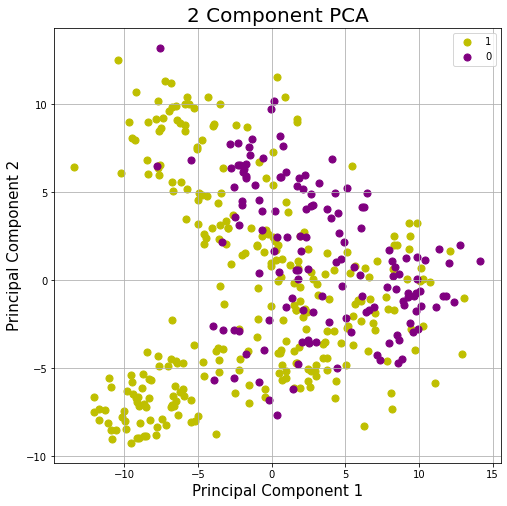

In [80]:
import matplotlib.pyplot as plt
#Generate the resulting scatter plot.
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = [1, 0]
colors = ['y', 'purple']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['winners'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()